In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

# Изяде ли мижката книжката? Или само вестника...

## Анализ на статистическите данни, свързани с разпространението на интернет в България. Съпоставка с тенденциите в издателската дейност

## Резюме

<b> „Дали мишката ще изяде книжката?“ </b> Въпросът, измислен като задача на кандидатстудентски изпит по журналистика в първите години на века, се превърна в популярна „крилата фраза“, в символ на едно очаквано явление. Обществените нагласи се сблъскваха по въпроса дали навлизането в интернет ще промени живота ни, дали ще ни накара да четем по-малко книги и вестници.

Изминаха повече от 2 десетилетия от века, повече от достатъчно време, за да се потърсят тенденциите. Използвани са данните, достъпни от безплатния [публичен портал на Националния статистически институт](https://infostat.nsi.bg/infostat/pages/external/login.jsf), които обхващат голяма част от периода (отделните таблици обхващат различни години). В допълнене се включват и данни за аналогични показатели, но от световни източници и базирани на глобалните тенденции. 

Анализът на данните е свързан с журналистическия материал по темата, който предстои да бъде публикуван на сайта [Дигитални истории](https://karamanev.me). В тази публикация информацията ще бъде представена по-скоро като журналистически текст, обхващайки повече тенденциите, отколкото статистическата разработка.  

### Източник на данни
Порталът [със свободен достъп на НСИ](https://infostat.nsi.bg/infostat/pages/external/login.jsf) е удобен източник на данни от различен характер, даващ възможност за теглене на широк кръг извадки с управляеми входни параметри. Неудобството е свързано с често липсващите данни, с различния обхват на отделните извадки, с липсата на добавена информация за характера на всяко проучване, което прави по-труден и анализа му. Така или иначе, информацията по основните показатели е достатъчно подробна и прецизно подредена.

Първата и основна за целите ни таблица отчита тенденциите в достъпа до интернет като цяло и на отделни групи на базата на различни демографски характеристики.

Точната формулировка е, че се измерва <b> промяната с годините на процента хора, които използват интернет всеки ден или поне веднъж седмично</b>.

In [3]:
## Тъй като данните не могат да се теглят чрез API, използваме свалени файлове.
## Грешка в софтуера на НСИ прави неизползваем един ред от таблицата. Тъй като за разделител се използва точка и запетая,
## Учащи (неработещи	 неактивни) заема две полета. Параметърът error_bad_lines=False поправя грешката, но пък редът отпада
## от таблицата, така че грешката е фиксирана ръчно в самата таблица. 

access_raw = pd.read_csv("NSI/web/access.csv", skiprows=[1])

In [20]:
access_raw.head()
plt.show() 

<Figure size 432x288 with 0 Axes>

In [6]:
access_raw.dtypes

Unnamed: 0     object
2004          float64
2006          float64
2007          float64
2008          float64
2009          float64
2010          float64
2011          float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017          float64
2018          float64
2019          float64
2020          float64
dtype: object

Очевидно форматът, предоставян от НСИ, предоставя пълни данни, но не и в достатъчно удобен за обработка вид. „Обръщаме“ го, така че за всяка следваща година да може да се добавя ред с данни по всеки показател.

In [7]:
access = access_raw.T
access

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,Общо,По статистически райони: Северозападен,По статистически райони: Северен централен,По статистически райони: Североизточен,По статистически райони: Югоизточен,По статистически райони: Югозападен,По статистически райони: Южен централен,По пол: Мъже,По пол: Жени,По образование: Основно или по-ниско,...,По възраст: 16-24 години,По възраст: 25-34 години,По възраст: 35-44 години,По възраст: 45-54 години,По възраст: 55-64 години,По възраст: 65-74 години,По трудов статус: Заети,По трудов статус: Безработни,"По трудов статус: Учащи (неработещи, неактивни)",По трудов статус: Други неактивни
2004,13.5,6.6,9.9,12.3,11,21.6,11.6,14.6,12.4,5.5,...,33.4,20,12.9,8.5,3,0.6,17.4,4.5,48.4,1.8
2006,21.8,14.8,15.6,19.4,18,34.8,16.2,22.6,21,9.8,...,46.8,31.4,24.1,16.9,6.4,0.7,28.7,5.8,68.9,2.9
2007,28.4,21.6,23.2,29.1,22.9,41,21.9,28.6,28.2,11.8,...,58.1,40.5,33.3,22.6,9.4,1.3,36.9,10.4,82.5,3.1
2008,33,23.6,31.1,29.1,27,45.1,29.7,33.7,32.4,14.7,...,65.5,49.6,38.4,25.7,11.1,1.3,40.9,17.7,83.2,4.8
2009,39.7,34.1,34.9,34.6,39.7,51.8,32.4,41.4,38.1,15.6,...,75.1,60.1,46.8,32,13.9,3.1,50.8,21.9,89.9,6.9
2010,41.6,36.4,39.7,36.3,36.2,54.7,34.9,42.1,41.2,15.9,...,76.1,59.8,49,36.6,18.4,3.2,54.8,26,93.5,8.3
2011,46.4,39,42.6,36.8,42.8,61.2,40.5,47.5,45.3,17.1,...,80,67.7,58.5,46.5,26.4,6.2,63.1,31.4,94.2,12.2
2012,50.3,37.5,47.9,45.5,49.4,60.6,47.5,51.1,49.5,19,...,81.3,72,65.8,46.3,25.9,8.2,68.1,35.1,96.2,14.1
2013,51.2,42.7,48.4,47.8,46.3,63.4,45.4,52.6,50,19.2,...,79.5,73.5,66.6,47.8,29.8,8.3,67.7,39.6,96.2,15.5


### На таблото

Очевидно тази таблица дава широк поглед, първо на общата статистика, а после - разделена по различни показатели. 

In [8]:
new_header = access.iloc[0] 
access = access[1:] 
access.columns = new_header

access

Unnamed: 0,Общо,По статистически райони: Северозападен,По статистически райони: Северен централен,По статистически райони: Североизточен,По статистически райони: Югоизточен,По статистически райони: Югозападен,По статистически райони: Южен централен,По пол: Мъже,По пол: Жени,По образование: Основно или по-ниско,...,По възраст: 16-24 години,По възраст: 25-34 години,По възраст: 35-44 години,По възраст: 45-54 години,По възраст: 55-64 години,По възраст: 65-74 години,По трудов статус: Заети,По трудов статус: Безработни,"По трудов статус: Учащи (неработещи, неактивни)",По трудов статус: Други неактивни
2004,13.5,6.6,9.9,12.3,11,21.6,11.6,14.6,12.4,5.5,...,33.4,20,12.9,8.5,3,0.6,17.4,4.5,48.4,1.8
2006,21.8,14.8,15.6,19.4,18,34.8,16.2,22.6,21,9.8,...,46.8,31.4,24.1,16.9,6.4,0.7,28.7,5.8,68.9,2.9
2007,28.4,21.6,23.2,29.1,22.9,41,21.9,28.6,28.2,11.8,...,58.1,40.5,33.3,22.6,9.4,1.3,36.9,10.4,82.5,3.1
2008,33,23.6,31.1,29.1,27,45.1,29.7,33.7,32.4,14.7,...,65.5,49.6,38.4,25.7,11.1,1.3,40.9,17.7,83.2,4.8
2009,39.7,34.1,34.9,34.6,39.7,51.8,32.4,41.4,38.1,15.6,...,75.1,60.1,46.8,32,13.9,3.1,50.8,21.9,89.9,6.9
2010,41.6,36.4,39.7,36.3,36.2,54.7,34.9,42.1,41.2,15.9,...,76.1,59.8,49,36.6,18.4,3.2,54.8,26,93.5,8.3
2011,46.4,39,42.6,36.8,42.8,61.2,40.5,47.5,45.3,17.1,...,80,67.7,58.5,46.5,26.4,6.2,63.1,31.4,94.2,12.2
2012,50.3,37.5,47.9,45.5,49.4,60.6,47.5,51.1,49.5,19,...,81.3,72,65.8,46.3,25.9,8.2,68.1,35.1,96.2,14.1
2013,51.2,42.7,48.4,47.8,46.3,63.4,45.4,52.6,50,19.2,...,79.5,73.5,66.6,47.8,29.8,8.3,67.7,39.6,96.2,15.5
2014,53.7,45.1,55.3,52.1,45.9,64.1,48.3,54.7,52.6,23.4,...,83.1,76.6,70.2,50.9,32.1,9,70.7,38.6,96.7,16.6


In [9]:
# подходящи наименования на колоните

access.columns=[
    'main',
    'nord_west',
    'nord_central',
    'nord_east',
    'south_east',
    'south_west',
    'south_central',
    'male',
    'female',
    'education_low',
    'education_mid',
    'education_high',
    'y16_24',
    'y25_34',
    'y35_44',
    'y45_54',
    'y55_64',
    'y65_74',
    'employeed',
    'uneployeed',
    'students',
    'inactive'
]

access

,main,nord_west,nord_central,nord_east,south_east,south_west,south_central,male,female,education_low,...,y16_24,y25_34,y35_44,y45_54,y55_64,y65_74,employeed,uneployeed,students,inactive
2004,13.5,6.6,9.9,12.3,11,21.6,11.6,14.6,12.4,5.5,...,33.4,20,12.9,8.5,3,0.6,17.4,4.5,48.4,1.8
2006,21.8,14.8,15.6,19.4,18,34.8,16.2,22.6,21,9.8,...,46.8,31.4,24.1,16.9,6.4,0.7,28.7,5.8,68.9,2.9
2007,28.4,21.6,23.2,29.1,22.9,41,21.9,28.6,28.2,11.8,...,58.1,40.5,33.3,22.6,9.4,1.3,36.9,10.4,82.5,3.1
2008,33,23.6,31.1,29.1,27,45.1,29.7,33.7,32.4,14.7,...,65.5,49.6,38.4,25.7,11.1,1.3,40.9,17.7,83.2,4.8
2009,39.7,34.1,34.9,34.6,39.7,51.8,32.4,41.4,38.1,15.6,...,75.1,60.1,46.8,32,13.9,3.1,50.8,21.9,89.9,6.9
2010,41.6,36.4,39.7,36.3,36.2,54.7,34.9,42.1,41.2,15.9,...,76.1,59.8,49,36.6,18.4,3.2,54.8,26,93.5,8.3
2011,46.4,39,42.6,36.8,42.8,61.2,40.5,47.5,45.3,17.1,...,80,67.7,58.5,46.5,26.4,6.2,63.1,31.4,94.2,12.2
2012,50.3,37.5,47.9,45.5,49.4,60.6,47.5,51.1,49.5,19,...,81.3,72,65.8,46.3,25.9,8.2,68.1,35.1,96.2,14.1
2013,51.2,42.7,48.4,47.8,46.3,63.4,45.4,52.6,50,19.2,...,79.5,73.5,66.6,47.8,29.8,8.3,67.7,39.6,96.2,15.5
2014,53.7,45.1,55.3,52.1,45.9,64.1,48.3,54.7,52.6,23.4,...,83.1,76.6,70.2,50.9,32.1,9,70.7,38.6,96.7,16.6


Започвам анализ на данните с най-първосигналните решения, за да опозная техния характер. Търся тенденцията в развитието на достъпа до интернет общо за страната и конкретно за Северозападната област, която е известна и като най-изостаналата в икономическо отношение територия в рамките на целия Европейски съюз.

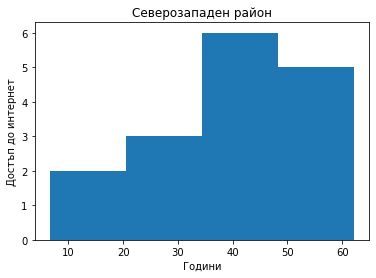

In [10]:
plt.hist(access.nord_west, bins = "fd")

plt.title("Северозападен район")
plt.xlabel("Години")
plt.ylabel("Достъп до интернет")
plt.show()

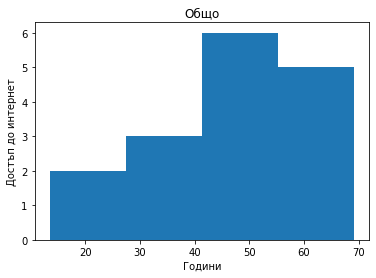

In [11]:
plt.hist(access.main, bins = "fd")

plt.title("Общо")
plt.xlabel("Години")
plt.ylabel("Достъп до интернет")
plt.show()

Очевидно таблиците са далеч от това, което ми е необходимо, затова опитвам с добавена библиотека, която дава доста недвусмислен резултат. Общият достъп до интернет расте всяка година, без изключение, ръстът в рамките на 16 години, е наистина огромен. 

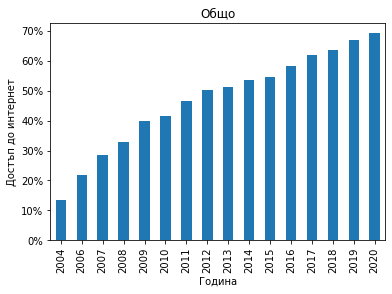

In [43]:
ax = access.main.plot(kind='bar')
plt.title("Общо")
plt.xlabel("Година")
plt.ylabel("Достъп до интернет")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

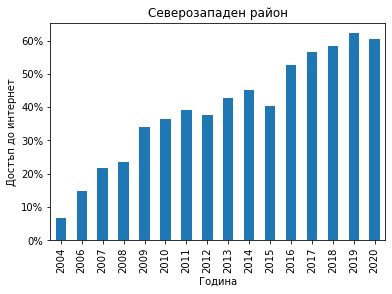

In [44]:
ax = access.nord_west.plot(kind='bar')
plt.title("Северозападен район")
plt.xlabel("Година")
plt.ylabel("Достъп до интернет")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Дивият Северозапад
Отделяйки само Северозападния регион, общата тенденция се запазва, но има и доста аномалии. Спадовете през 2012-а и 2015-а трудно могат да бъдат обяснени. Третият спад, от 2020-а, може би има някакво обяснение с коронавируса. Иначе, като цяло, се потвърждава общата тенденция. 

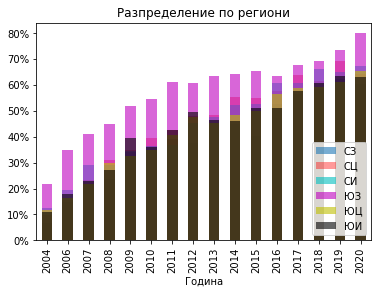

In [14]:
access.nord_west.plot(kind='bar', alpha = 0.6, label="СЗ")
access.nord_central.plot(kind='bar', color="r", alpha = 0.4, label="СЦ")
access.nord_east.plot(kind='bar', color="c", alpha = 0.6, label="СИ")
access.south_west.plot(kind='bar', color="m", alpha = 0.6, label="ЮЗ")
access.south_central.plot(kind='bar', color="y", alpha = 0.6, label="ЮЦ")
ax = access.south_east.plot(kind='bar', color="k", alpha = 0.6, label="ЮИ")

plt.title("Разпределение по региони")
plt.xlabel("Година")
plt.legend(loc='lower right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### На бар
Очевидно наслагването на bar-ове не е особено ползотворно, тенденциите при отделните региони се открояват трудно, затова опитвам с plot-ване.

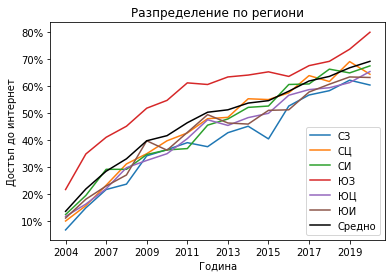

In [45]:
access.nord_west.plot(label="СЗ")
access.nord_central.plot(label="СЦ")
access.nord_east.plot(label="СИ")
access.south_west.plot(label="ЮЗ")
access.south_central.plot(label="ЮЦ")
access.south_east.plot(label="ЮИ")
ax = access.main.plot(label="Средно", color="black")

plt.title("Разпределение по региони")
plt.ylabel("Достъп до интернет")
plt.xlabel("Година")

plt.legend(loc='lower right')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Град държава

В съпоставката на регионите се откроява, логично, Югозападният, където попада и София. Достъпът до интернет в останалите часи от страната върви с определено изоставане (което може да се дължи дори само на по-възрастното население). Северозападният регион в някои от годините е последен, но не се откроява драстично и в други години е надминаван от други части на страната.

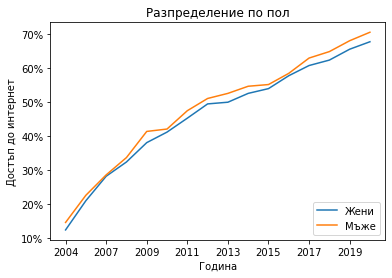

In [46]:
access.female.plot(label="Жени")
ax = access.male.plot(label="Мъже")

plt.title("Разпределение по пол")
plt.ylabel("Достъп до интернет")
plt.xlabel("Година")
plt.legend(loc='lower right')
 
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Тенденциите в достъпа до интернет не варират особено в зависимост от пола. Мъжете са водещи минимално през всяка от годините, но разликата е минимална.

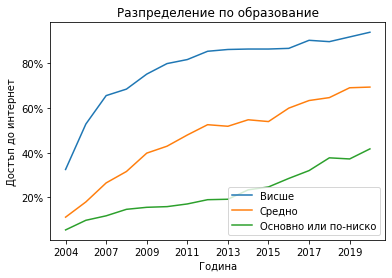

In [47]:
access.education_high.plot(label="Висше")
access.education_mid.plot(label="Средно")
ax = access.education_low.plot(label="Основно или по-ниско")

plt.title("Разпределение по образование")
plt.ylabel("Достъп до интернет")
plt.xlabel("Година")
plt.legend(loc='lower right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Нет с диплома

Тук виждаме първата съпоставка, в която има сериозна диверсификация между отделните групи. Особено в първите години на наблюдавания период расте драстично процентът на висшистите с всекидневен достъп до интернет, впоследствие ръстът при трите групи, разделени по образователни степени, се запазва сходен, разликата е по-скоро изначална.

Струва си да се отбележи и ръстът при най-слабо образованите в последните две години от статистическата извадка, вероятно свързан с промените, наложени от пандемията.

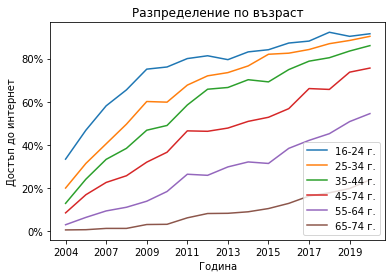

In [48]:
access.y16_24.plot(label='16-24 г.')
access.y25_34.plot(label='25-34 г.')
access.y35_44.plot(label='35-44 г.')
access.y45_54.plot(label='45-74 г.')
access.y55_64.plot(label='55-64 г.')
ax = access.y65_74.plot(label='65-74 г.')

plt.title("Разпределение по възраст")
plt.xlabel("Година")
plt.ylabel("Достъп до интернет")
plt.legend(loc='lower right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Остаряваме бавно

Напълно очаквавон, разликите по възраст са доста сериозни.

В първите години от разглеждания период се наблюдава много сериозен ръст на хората, които ежедневно ползват интернет, като той е толкова по-драстичен, колкото по-млада е групата, обхваната от извадката. Впоследствие тенденциите се запазват, откроява се по-бавният ръст на хората от най-възрастната група, обхваната от статистиката. Не бива да се игнорира и фактът, че обхватът на ститистиката (16 г.) включва и смяната на поколенията. Човек, който пред 2004-а е бил на 24, през 2020-а вече е на 40 години. 

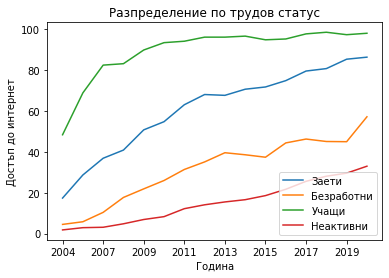

In [49]:
access.employeed.plot(label='Заети')
access.uneployeed.plot(label='Безработни')
access.students.plot(label='Учащи')
access.inactive.plot(label='Неактивни')  

plt.title("Разпределение по трудов статус")
plt.xlabel("Година")
plt.ylabel("Достъп до интернет")
plt.legend(loc='lower right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Работа, работа, работа

Разделението по трудов статус показва няколко тенденции. Процентът при учащите в първите години от периода расте драстично, което е свързано и с поколенческите тенденции от предишната графика. При работещите тенденцията е за силен ръст в първите години от периода и по-плавен след това. Интересни са отклоненията при безработните, особено през последнаа година. От една страна, те вероятно се дължат на факта, че много хора попаднаха в тази група като част от секторите, сериозно засегнати от пандемията. От друга, може би си струва да се надяваме, че става дума и за хора, които са се убедили, че онлайн светът предоставя сериозни възможности за професионално развитие.

Нека видим как през същия период се променят тенденциите в печатните издания. Първо разглеждам общия тираж на издаваните вестници.

In [34]:
## издадени вестници по годишен тираж и по периодичност на годишна база

newspapers_initial = pd.read_csv("NSI/publishing/newspapers_issued.csv",  skiprows=[1,2], delimiter=";", decimal=".")
newspapers = newspapers_initial.T

new_header = newspapers.iloc[0]
newspapers = newspapers[1:]
newspapers.columns = new_header
newspapers

Unnamed: 0,Общо,Ежедневници,Излизащи 2 - 3 пъти седмично,Излизащи един път седмично,Излизащи по-малко от един път седмично
2005,310023,182578,394,102904,24148
2006,325733,190896,664,117245,16928
2007,338590,159418,211,122884,56077
2008,370789,219287,-,128509,22993
2009,355600,204865,-,134403,16332
2010,340812,186792,-,138418,15602
2011,373111,231837,-,125688,15586
2012,374660,230192,7794,126550,10126
2013,324310,196874,6555,118056,2825
2014,315712,173257,6233,133392,2830


In [35]:
# Форматиране и изчистване на данните
# TODO именуване на променливите
# Изключваме групата на излизащите 2-3 пъти седмично, защото очевидно нещо с тях не е наред.
# Не се регистрират в голяма част от периода, след това изведнъж стойностите им се променят драстично.

newspapers.drop(newspapers.tail(1).index,inplace=True)
newspapers['Общо'] = newspapers['Общо'].fillna(0.0).astype(int)
newspapers['Ежедневници'] = newspapers['Ежедневници'].fillna(0.0).astype(int)
newspapers['Излизащи един път седмично'] = newspapers['Излизащи един път седмично'].fillna(0.0).astype(int)
newspapers['Излизащи по-малко от един път седмично'] = newspapers['Излизащи по-малко от един път седмично'].fillna(0.0).astype(int)
del newspapers['Излизащи 2 - 3 пъти седмично']
newspapers

Unnamed: 0,Общо,Ежедневници,Излизащи един път седмично,Излизащи по-малко от един път седмично
2005,310023,182578,102904,24148
2006,325733,190896,117245,16928
2007,338590,159418,122884,56077
2008,370789,219287,128509,22993
2009,355600,204865,134403,16332
2010,340812,186792,138418,15602
2011,373111,231837,125688,15586
2012,374660,230192,126550,10126
2013,324310,196874,118056,2825
2014,315712,173257,133392,2830


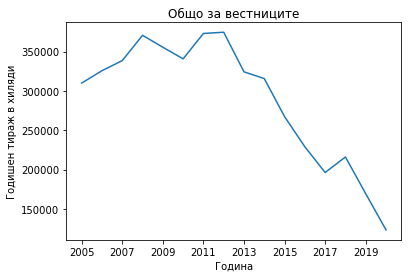

In [50]:
newspapers['Общо'].plot()
plt.title("Общо за вестниците")
plt.xlabel("Година")
plt.ylabel("Годишен тираж в хиляди")

plt.show()

### По наклонената плоскост

Тази графика не се нуждае от кой знае какъв коментар. След 2012-а общият тираж на отпечатваните вестници рухва постепенно, но сигурно и драстично.

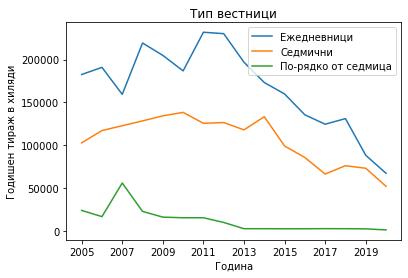

In [51]:
newspapers["Ежедневници"].plot()
newspapers["Излизащи един път седмично"].plot(label='Седмични')
newspapers["Излизащи по-малко от един път седмично"].plot(label='По-рядко от седмица')

plt.title("Тип вестници")
plt.xlabel("Година")
plt.ylabel("Годишен тираж в хиляди")
plt.legend()
plt.show()

Не се наблюдават особени разлики по тип вестник. Най-много страдат ежедневниците, които са и най-популярни, но очевидно тенденцията е обща.

Нека проверим как стоят нещата по брой заглавия - колко общо вестници излизат през годините и отделно - по периодичност.

In [52]:
## издадени вестници по брой заглавия и периодичност на годишна база

newspapers_count_initial = pd.read_csv("NSI/publishing/newspapers_count.csv",  skiprows=[1,2], delimiter=";", decimal=".")
newspapers_count = newspapers_count_initial.T

new_header = newspapers_count.iloc[0]
newspapers_count = newspapers_count[1:]
newspapers_count.columns = new_header
newspapers_count

Unnamed: 0,Общо,Ежедневници,Излизащи 2 - 3 пъти седмично,Излизащи един път седмично,Излизащи по-малко от един път седмично
2005,423,60,3,183,177
2006,446,63,7,194,182
2007,448,64,3,194,187
2008,438,70,-,188,180
2009,436,67,-,183,186
2010,359,60,-,148,151
2011,369,62,-,157,150
2012,354,57,20,155,122
2013,307,54,18,137,98
2014,295,55,17,127,96


In [53]:
# изчистване на таблицата
# TODO именуване на променливите

newspapers_count.drop(newspapers_count.tail(1).index,inplace=True)
newspapers_count['Общо'] = newspapers_count['Общо'].fillna(0.0).astype(int)
newspapers_count['Ежедневници'] = newspapers_count['Ежедневници'].fillna(0.0).astype(int)
newspapers_count['Излизащи един път седмично'] = newspapers_count['Излизащи един път седмично'].fillna(0.0).astype(int)
newspapers_count['Излизащи по-малко от един път седмично'] = newspapers_count['Излизащи по-малко от един път седмично'].fillna(0.0).astype(int)
del newspapers_count['Излизащи 2 - 3 пъти седмично']
newspapers_count

Unnamed: 0,Общо,Ежедневници,Излизащи един път седмично,Излизащи по-малко от един път седмично
2005,423,60,183,177
2006,446,63,194,182
2007,448,64,194,187
2008,438,70,188,180
2009,436,67,183,186
2010,359,60,148,151
2011,369,62,157,150
2012,354,57,155,122
2013,307,54,137,98
2014,295,55,127,96


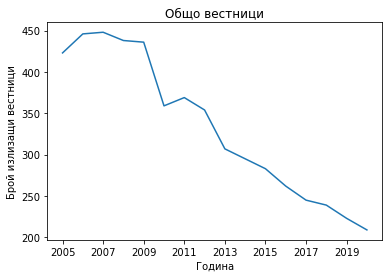

In [25]:
newspapers_count['Общо'].plot()
plt.title("Общо вестници")
plt.xlabel("Година")
plt.ylabel("Брой излизащи вестници")
plt.show()

Тук също тенденцията е очевидна, броят на издаваните вестници бързо намалява след скромния ръст в самото начало на обхванатия период.

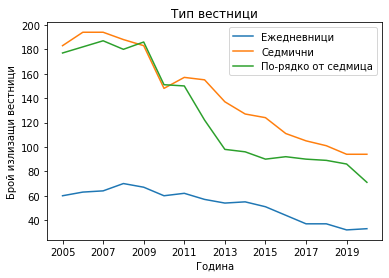

In [54]:
newspapers_count["Ежедневници"].plot()
newspapers_count["Излизащи един път седмично"].plot(label='Седмични')
newspapers_count["Излизащи по-малко от един път седмично"].plot(label='По-рядко от седмица')

plt.title("Тип вестници")
plt.xlabel("Година")
plt.ylabel("Брой излизащи вестници")
plt.legend()
plt.show()

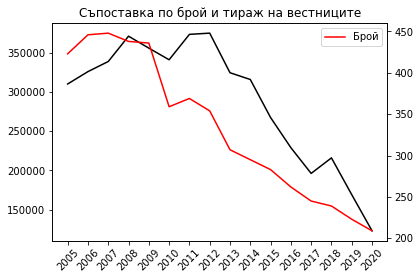

In [80]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_right.tick_params(axis='x', rotation=45)
ax_left.tick_params(axis='x', rotation=45)

ax_left.plot(newspapers['Общо'], color='black', label='Тираж')
ax_right.plot(newspapers_count['Общо'], color='red',label='Брой')
plt.title("Съпоставка по брой и тираж на вестниците")

plt.legend()
plt.show()

Съпоставям тенденциите, що се отнася до тиража на вестниците и броя на изданията. Очевидно от средата на периода те започват да спадат драстично, тенденцията е сходна.

Нека обаче проверим как стоят нещата по отношение на списанията. Те са друг тип медия, дали спадът ще е също толкова драстичен?

In [81]:
# издадени списания на годишна база
# Останалите стъпки са сходни, защото са необходими за обработката на данните, предоставяни в един и същи формат от НСИ.

magazines_initial = pd.read_csv("NSI/publishing/magazines.csv",  skiprows=[1,2,3], delimiter=";", decimal=".")
magazines = magazines_initial.T

new_header = magazines.iloc[0] 
magazines = magazines[1:] 
magazines.columns = new_header
magazines

Unnamed: 0,Общо
2012,23099
2013,19353
2014,17715
2015,20844
2016,16738
2017,16492
2018,14380
2019,8692
2020,8038
Unnamed: 10,NaN


In [82]:
magazines.drop(magazines.tail(1).index,inplace=True)
magazines['Общо'] = magazines['Общо'].fillna(0.0).astype(int)
magazines

Unnamed: 0,Общо
2012,23099
2013,19353
2014,17715
2015,20844
2016,16738
2017,16492
2018,14380
2019,8692
2020,8038


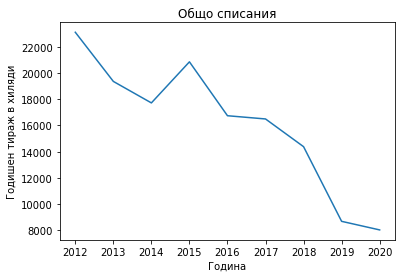

In [84]:
magazines['Общо'].plot()
plt.title("Общо списания")
plt.xlabel("Година")
plt.ylabel("Годишен тираж в хиляди")
plt.show()

След интересен ръст през 2015-а (който вероятно има някакво обяснение, за което аз не се досещам), се наблюдава бърз и драстичен спад в тиража на издаваните списания.

Как ли изглеждат тенденциите, ако бъдат съпоставени с вестниците?

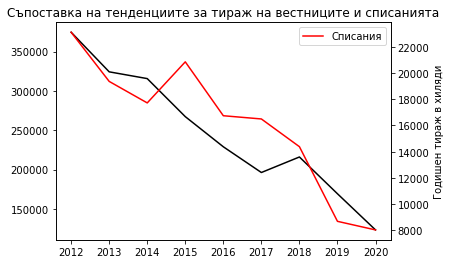

In [85]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
   
newspapers_from_2012 = newspapers.iloc[7:]
newspapers_from_2012
  
ax_left.plot(newspapers_from_2012['Общо'], color='black', label='Вестници')
ax_right.plot(magazines['Общо'], color='red', label='Списания')
plt.xticks(rotation=0)
plt.title("Съпоставка на тенденциите за тираж на вестниците и списанията")
plt.xlabel("Година")
plt.ylabel("Годишен тираж в хиляди")

plt.legend()
plt.show()

Тенденциите са напълно сходни, логично е да отдадем дребните отклонения на статистическата грешка.

Ето че стигаме до книгите. А как се променя интересът към тях?

In [86]:
## издадени книги като тираж на годишна база

books_initial = pd.read_csv("NSI/publishing/books_issued.csv", delimiter=";", skiprows=[1,2], decimal=".")
books = books_initial.T

books

,0
2006,4138.0
2007,4797.0
2008,4646.0
2009,5971.0
2010,3220.0
2011,3213.0
2012,4982.0
2013,4445.0
2014,4031.0
2015,4904.0


In [87]:
books.columns = ['Общо']
books.drop(books.tail(1).index,inplace=True)
books

,Общо
2006,4138.0
2007,4797.0
2008,4646.0
2009,5971.0
2010,3220.0
2011,3213.0
2012,4982.0
2013,4445.0
2014,4031.0
2015,4904.0


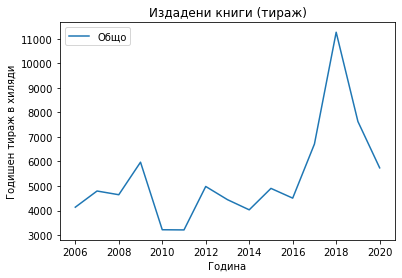

In [88]:
books['Общо'].plot()
plt.title("Издадени книги (тираж)")
plt.xlabel("Година")
plt.ylabel("Годишен тираж в хиляди")
plt.legend()
plt.show()

### Всички пишат

Видимо тенденцията е различна в сравнение с периодичните издания. 2018-а очевидно е интересен пик, който обаче не е извън основната логика, защото се ражда постепенно и изчезва, дори още преди 2020-а с пандемията и логично намалелите по чисто технически причини издания.

Тенденцията видимо е не само за запазване, а и за ръст на книгоиздаването на базата на 10-годишен период.

Наистина е много интересно какво се случва конкретно през 2018-а.

In [89]:
## издадени книги като брой заглавия на годишна база

books_count_initial = pd.read_csv("NSI/publishing/books_count.csv", delimiter=";", skiprows=[1,2], decimal=".")
books_count = books_count_initial.T

books_count

,0
2006,6562.0
2007,6648.0
2008,6767.0
2009,6491.0
2010,4614.0
2011,5078.0
2012,8263.0
2013,6853.0
2014,7515.0
2015,9320.0


In [90]:
books_count.drop(books_count.tail(1).index,inplace=True)
books_count['Общо'] = books_count[0].astype(int)
del books_count[0]
books_count

,Общо
2006,6562
2007,6648
2008,6767
2009,6491
2010,4614
2011,5078
2012,8263
2013,6853
2014,7515
2015,9320


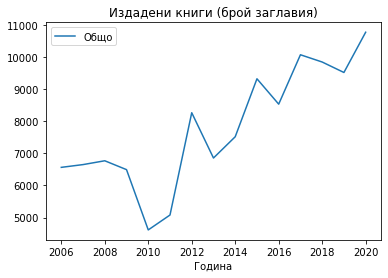

In [91]:
books_count['Общо'].plot()
plt.title("Издадени книги (брой заглавия)")
plt.xlabel("Година")

plt.legend()
plt.show()

Броят на издадените книги видимо расте, след почти всеки временен спад следва пик.

Особено интересен е ръстът в броя на издадените книги между 2019 и 2020 г.

Време е за съпоставки между няколко от анализите, които направихме до момента.

Как ли изглеждат данните, ако сравним тенденциите за издадените вестници и книги като тираж? 

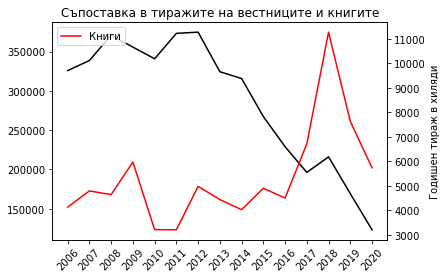

In [92]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
   
ax_right.tick_params(axis='x', rotation=45)
ax_left.tick_params(axis='x', rotation=45)
newspapers_from_2006 = newspapers.iloc[1:]
  
ax_left.plot(newspapers_from_2006['Общо'], color='black', label='Вестници')
ax_right.plot(books['Общо'], color='red', label='Книги')
plt.xticks(rotation=0)
plt.title("Съпоставка в тиражите на вестниците и книгите")
plt.xlabel("Година")
plt.ylabel("Годишен тираж в хиляди")

plt.legend()
plt.show()

Очевидно нищо изненадващо на фона на показаното дотук.

Интересно е все пак да отчетем общата тенденция след 2018-а, резкия спад в тиражите, дори година преди пандемията.

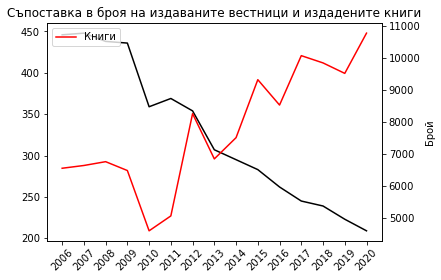

In [93]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_right.tick_params(axis='x', rotation=45)
ax_left.tick_params(axis='x', rotation=45)
   
newspapers_count_from_2006 = newspapers_count.iloc[1:]
  
ax_left.plot(newspapers_count_from_2006['Общо'], color='black', label='Вестници')
ax_right.plot(books_count['Общо'], color='red', label='Книги')
plt.xticks(rotation=90)
plt.title("Съпоставка в броя на издаваните вестници и издадените книги")
plt.xlabel("Година")
plt.ylabel("Брой")

    
plt.legend()
plt.show()

### Нагоре - надолу

Разликата, що се отнася до брой издания, а не тираж, е много драстична. Все повече нови книги и все по-малко различни вестници.

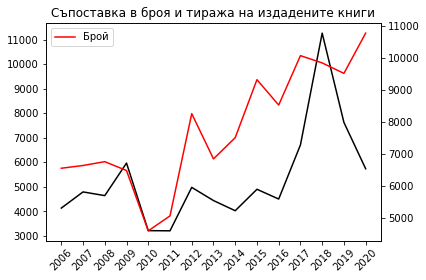

In [94]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_right.tick_params(axis='x', rotation=45)
ax_left.tick_params(axis='x', rotation=45)
   
ax_left.plot(books['Общо'], color='black', label='Тираж')
ax_right.plot(books_count['Общо'], color='red', label='Брой')

plt.title("Съпоставка в броя и тиража на издадените книги")
plt.xlabel("Година")
plt.legend()
plt.show()

Тъй като наистина е интересен спадът в тиражите при книгите от последните години, още по-необяснимо става, ако съпоставим общия брой издадени книги с общия брой заглавия. Тенденциите се припокриват, с изключение на края на периода.

И така, вече е доста ясно, че все повече българи имат достъп до интернет, тиражите на периодичните медии са се сгромолясали за този период. Каква може да бъде причината? Има ли как да се докаже връзката между двете тенденции?

Свалям доста таблици от НСИ, най-близо като тема на допитването се оказва тази, отчитаща причините за използване на интернет за лични цели.

In [95]:
## причини за използване на интернет за лични цели

reasons_initial = pd.read_csv("NSI/web/reasons.csv", delimiter=";", skiprows=[1,2], decimal=".")
reasons = reasons_initial.T
new_header = reasons.iloc[0] 
reasons = reasons[1:] 
reasons.columns = new_header

reasons

Unnamed: 0,Консултиране с онлайн енциклопедии (напр. Wikipedia),Създаване на уеб страници или блогове,Провеждане на онлайн курсове (всякакъв тип),Изтегляне на софтуер,Намиране на информация за стоки и услуги,"Системни образователни дейности (училищни, университетски и др.)",Интернет банкиране чрез уебсайт или приложение,Слушане на радио в интернет,Слушане на радио и/или гледане на телевизия,Търсене или кандидатстване за работа по интернет,...,"Слушане на музика онлайн (напр. уеб радио, стрийминг на музика чрез приложения като YouTube, Spotify, Deezer и др.)","Гледане на телевизия в интернет (на живо или на запис) от телевизионни оператори (напр. A1 Xplore TV, TV Go, Bulsatcom TV, Nova Play)","Гледане на видео по заявка от платени услуги (напр. Voyo, Netflix, HBO GO, Amazon Prime Video)","Гледане на видео съдържание от услуги за видеосподеляне (напр. YouTube, Vbox7)","Използване на платежни инструменти (напр. ePay, PayPal) за плащане на стоки или услуги поръчани по интернет","Размяна на съобщения в реално време (чрез приложения като Skype, Messenger, WhatsApp, Viber, Snapcahat)","Споделяне или публикуване на собствено създадени видео, снимки, музика, текст и др. на уебсайт или чрез приложение","Слушане на музика онлайн (напр. уеб радио, музика от You Tube) или сваляне на музика",Достъп до лична здравна информация онлайн (напр. проверка на резултати от изследвания),"Използване на други здравни услуги чрез уебсайт или приложение (напр. получаване на рецепта, онлайн медицинска консултация) без посещение в болница или при лекар"
2004,.,.,.,.,8.0,3.3,0.6,.,6.1,3.1,...,.,.,.,.,.,.,.,.,.,.
2006,.,.,.,4.2,13.5,4.3,1.3,.,10.6,4.4,...,.,.,.,.,.,.,.,.,.,.
2007,.,.,0.6,5.1,17.3,.,1.7,.,9.9,5.1,...,.,.,.,.,.,.,.,.,.,.
2008,.,.,0.8,5.6,21.7,.,1.5,.,13.0,6.5,...,.,.,.,.,.,.,.,.,.,.
2009,.,.,0.9,7.2,17.4,.,1.8,.,17.2,8.7,...,.,.,.,.,.,.,.,.,.,.
2010,.,.,1.9,8.7,26.4,.,2.5,.,17.9,9.4,...,.,.,.,.,.,.,.,.,.,.
2011,14.6,.,2.0,8.5,27.6,.,3.4,.,.,11.7,...,.,.,.,.,.,.,.,.,.,.
2012,.,3.8,.,.,35.8,.,3.6,.,26.2,.,...,.,.,.,.,.,.,.,.,.,.
2013,11.9,.,2.3,8.9,34.9,.,4.6,.,.,9.9,...,.,.,.,.,.,.,.,.,.,.
2014,.,4.5,.,NaN,41.3,.,4.7,19.2,.,.,...,.,.,.,.,.,.,.,.,.,.


In [96]:
reasons.columns.tolist()

['Консултиране с онлайн енциклопедии (напр. Wikipedia)',
 'Създаване на уеб страници или блогове',
 'Провеждане на онлайн курсове (всякакъв тип)',
 'Изтегляне на софтуер',
 'Намиране на информация за стоки и услуги',
 'Системни образователни дейности (училищни, университетски и др.)',
 'Интернет банкиране чрез уебсайт или приложение',
 'Слушане на радио в интернет',
 'Слушане на радио и/или гледане на телевизия',
 'Търсене или кандидатстване за работа по интернет',
 'Търсене на информация за образование, обучения или курсове',
 'Записване на час при лекар чрез уебсайт или приложение (напр. на болница, здравен център, SuperDoc, EasyDoc)',
 'Други комуникационни услуги (чат портали и др.)',
 'Други образователни дейности свързани с професионална заетост',
 'Други финансови услуги (в т.ч. покупки на акции)',
 'Търсене на друга информация или онлайн услуги',
 'Участие в професионални онлайн мрежи (създаване на профил, публикуване на съобщения и др. дейности във Linkedln, Xing и др. професи

### По света и у нас

Данните са много непълни, възможните отговори очевидно са много зле подбрани, дори липсва всякаква възможност за търсене на информация и новини, което е своеобразен еквивалент на вестниците и списанията онлайн.

Като следваща стъпка, съпоставям данните от България със световните. В издателската дейност се оказва почти невъзможно, за разлика от достъпа до интернет.

Онлайн откривам [данни от Световната банка](https://data.worldbank.org/indicator/IT.NET.USER.ZS), които обаче са почти невъзможни за обработване заради огромните липси.

По-подходящи са данните от платформата [Kaggle](https://www.kaggle.com/babyoda/internet-access-oecd?select=DP_LIVE_25112020170111306.csv), които са взети от Организацията за икономическо развитие към ООН [OECD](https://data.oecd.org/ict/internet-access.htm). Те отразяват достъпа на домакинствата до интернет, обхващат периода 2006-2019 г. България не попада в листата.

In [97]:
## данни от платформата Kaggle за достъпа до интернет

kaggle_data = pd.read_csv("kaggle/data.csv")
kaggle_data = kaggle_data.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis = 1) 
kaggle_data

,LOCATION,TIME,Value
0,BEL,2005,50.157500
1,BEL,2006,53.959700
2,BEL,2007,60.164000
3,BEL,2008,63.627600
4,BEL,2009,67.435200
...,...,...,...
510,CRI,2015,60.181183
511,CRI,2016,64.800000
512,CRI,2017,68.600000
513,CRI,2018,73.080247


In [98]:
kaggle_data.groupby('LOCATION').size()


LOCATION
AUS     8
AUT    15
BEL    15
BRA    12
CAN     6
CHE    11
CHL     8
COL    10
CRI    15
CZE    15
DEU    15
DNK    15
ESP    15
EST    15
FIN    15
FRA    14
GBR    15
GRC    15
HUN    15
IRL    15
ISL    13
ISR    13
ITA    15
JPN     5
KOR    15
LTU    15
LUX    15
LVA    15
MEX    15
NLD    15
NOR    15
NZL     3
POL    15
PRT    15
SVK    15
SVN    15
SWE    15
TUR    13
USA     9
dtype: int64

In [99]:
kaggle_data.groupby('TIME').size()

TIME
2005    32
2006    35
2007    35
2008    36
2009    38
2010    35
2011    33
2012    37
2013    36
2014    35
2015    33
2016    33
2017    34
2018    31
2019    32
dtype: int64

In [100]:
kaggle_data.dtypes

LOCATION     object
TIME          int64
Value       float64
dtype: object

Обхванати са 39 държави, като за повечето от тях има данни за всяка от годините в периода 2006-2019. Очевидно са избрани така, че да са с различна степен на икономическо развитие, което прави данните подходящи за съпоставка и анализ.

In [101]:
kaggle_data.groupby([('TIME'),('LOCATION')]).sum()

Value
TIME LOCATION           
2005 AUS       60.000000
     AUT       46.688700
     BEL       50.157500
     CAN       64.300000
     CRI       10.202027
...                  ...
2019 SVK       82.191100
     SVN       88.961110
     SWE       96.059620
     TUR       88.299460
     USA       79.880000

[515 rows x 1 columns]

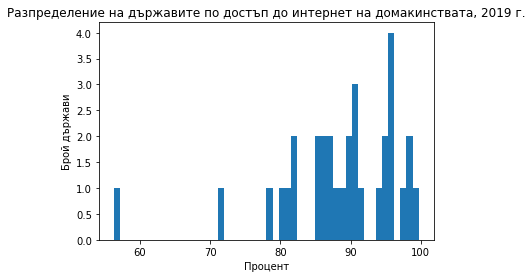

In [105]:
countries_access_2019 = kaggle_data[kaggle_data.TIME == 2019].sort_values(by=['Value'], ascending=True)
plt.hist(countries_access_2019.Value, bins = 50)

plt.title("Разпределение на държавите по достъп до интернет на домакинствата, 2019 г.")
plt.xlabel("Процент")
plt.ylabel("Брой държави")

plt.show()

In [106]:
np.median(countries_access_2019.Value)

89.81875199999999

През 2019 г. за много голяма част от държавите над 85% от домакинствата имат достъп до интернет. Медианната стойност е близо 90%. 

In [107]:
access.loc['2019'].main

66.8

### Крачка назад

Съпоставката с данните от таблицата на НСИ за България показват значително по-ниски стойности за България в сравнение със световните тенденции.

А как стоят нещата в началото на наблюдавания период, през 2006 г.? 

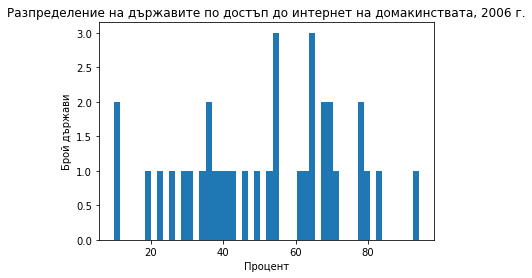

In [108]:
countries_access_2006 = kaggle_data[kaggle_data.TIME == 2006].sort_values(by=['Value'], ascending=True)
plt.hist(countries_access_2006.Value, bins = 50)

plt.title("Разпределение на държавите по достъп до интернет на домакинствата, 2006 г.")
plt.xlabel("Процент")
plt.ylabel("Брой държави")

plt.show()

In [109]:
np.median(countries_access_2006.Value)

53.9597

In [110]:
access.loc['2006'].main

21.8

### Българин зад мишката

Наблюдава се доста по-сериозна стратификация между държавите, в някои през 2006 г. достъп имат много малка част от домакинствата, в други той доближава 100%. Съпоставката на медианната стойност с българските данни обаче отново дава сигнал, че у нас достъпът е значително по-нисък от средните стойности. Кои ли са тези държави, които се открояват в двата края на таблицата и кои се доближават до българските стойности?

In [111]:
countries_access_2006[countries_access_2006.Value > 0]

,LOCATION,TIME,Value
501,CRI,2006,9.809451
268,MEX,2006,10.130000
102,CHL,2006,19.700000
184,GRC,2006,23.122700
298,SVK,2006,26.580800
74,CZE,2006,29.250500
338,HUN,2006,31.645200
476,LTU,2006,34.513100
398,PRT,2006,35.153400
126,POL,2006,35.939200


In [112]:
countries_access_2019[countries_access_2019.Value > 0]

,LOCATION,TIME,Value
281,MEX,2019,56.356869
323,BRA,2019,71.400000
197,GRC,2019,78.540224
261,USA,2019,79.880000
411,PRT,2019,80.938530
489,LTU,2019,81.518840
311,SVK,2019,82.191100
366,ITA,2019,85.172590
474,LVA,2019,85.449463
351,HUN,2019,86.200935


### Мексико срещу Южна Корея

Мексико и, донякъде учудващо, Гърция, се открояват като изоставащи и в началото, и в края на периода. Други, като например Коста Рика, имат сериозен ръст. Любопитно е, че САЩ, за които няма данни през 2006-а, са сред изоставащите през 2019 г. Лидер със сериозна разлика и в началото, и в края на периода, е Южна Корея, където днес почти 100% от домакинствата имат интернет.

Редно е да отбележим, че съпоставката с българските данни от първоначалната таблица не е съвсем прецизна, тъй като тя измерва показателя за брой хора, които поне веднъж седмично влизат в мрежата, докато световните данни са за достъп на домакинствата. Затова добавяме за съпоставка и еквивалентната таблица от Националния статистически институт. 

In [113]:
## достъп до интернет на домакинствата

access_homes_initial = pd.read_csv("NSI/web/access_homes.csv", delimiter=";", skiprows=[1], decimal=".")
access_homes = access_homes_initial.T
new_header = access_homes.iloc[0] 
access_homes = access_homes[1:] 
access_homes.columns = new_header

access_homes

Unnamed: 0,Общо за страната
2004,9.6
2006,17
2007,19
2008,25.3
2009,29.6
2010,33.1
2011,45
2012,50.9
2013,53.7
2014,56.7


In [114]:
access_homes.loc['2006']['Общо за страната']

17.0

In [115]:
access_homes.loc['2019']['Общо за страната']

75.1

### Далеч от целта

Въпреки това, отново стойностите остават далеч под медианните за достъпа на различните държави. Все пак, наблюдава се много сериозен ръст за периода - от 17% до 3/4 от домакинствата.

## Изводи

- В първите две десетилетия на XXI век се забелязва много сериозен ръст на достъпа до интернет на домакинствата и на хората, които поне веднъж седмично влизат в световната мрежа.

- Вестниците и списанията отбелязват за същия период много сериозен спад, тиражите и броят на изданията намаляват драстично, което се откроява като неоспорима тенденция.

- Подобна тенденция не се наблюдава при книгоиздаването - и тиражите, и броят на новоиздадените книги расте (с изключение на минимален спад за последните две години).

- Трудно може да се докаже пряката корелация между навлизането на интернет и краха на печатните медии чрез директни статистически данни (главно заради липсата на подходяща статистика, която да отразява начина, по който аудиторията се информира и нагласите ѝ към печатните медии), но връзката е достатъчно интуитивна и логична.

- Не, мишката не изяде книжката, двете явно имат различни полета за изява. Вестникът и списанието обаче (по всичко личи, необратимо) станаха жертва на дигитализацията.